# Questão 4

## Relatório do Trabalho feito

Nesta atividade, assim como na Questão 3, realizei uma sequencia de 4 experimentos para observar as mudanças de desempenho comparado com alterações na arquitetura do modelo.

### Experimento 1

Inicialmente aumentei o numero de camadas convolucionais no modelo, observando que não necessariamente  mais camadas convolucionais resultam numa melhora de desempenho. Escolhendo a estrutura que favoreceu o melhor resultado no Teste, segui para o Experimento 2.

### Experimento 2

Neste Experimento, alterei o número de filtros das camadas convolucionais, variando de acordo com a estrutura escolhida anteriormente.
Foi observado que o aumento de filtros favoreceu o ganho de desempenho. Entretanto, este aumento gerou um tempo maior para realizar o treinamento. Dessa forma foi escolhido valores de filtros que tiveram um otimo desempenho sem demorar tanto durante a fase de treinamento.

### Implementação da Questão 3

Nesta etapa utilizei a minha arquitetura encontrada na Questão 3 como forma de classificador da Rede Neural Convolucional.


### Experimento 3

Seguindo com os experimentos, foi avaliado qual o melhor valor de Dropout que gerasse um melhor desempenho na arquitetura proposta. 
Através de uma varredura entre Dropouts(0 até 0,6), foi observado que o Dropout(0,4) resultou na melhor precisão durante os testes.


### Experimento 4

Como ultimo experimento, implementei o Batch Normalization junto e sem o Dropout no modelo. Nessa etapa foi utilizado 15 epochs para comparar os resultados após a estabilização da precisão dos resultados.
Como resultado, a arquitetura sem o Batch Normalization, somente com o Dropout(0,4) resultou na melhor precisão.


### Final

Para finalizar, foi utilizado todos os melhores resultados observados nos Experimentos e sintetizado uma versão final do modelo de aprendizado.
Para essa etapa foi utilizado 20 Epochs de treinamento.

Os valores de precisão no Teste estão representados na Tabela abaixo:

| |Precisão no Teste (%)|
|---|---|
|Roteiro|99,11|
|Experimento 1|99,33|
|Experimento 2|99,40|
|Experimento 3|99,37|
|Experimento 4|99,48|
|Final|99,52|

Por fim abaixo se encontra um grafico com a evolução da acurácia do treino (Roteiro e Arquitetura Final)

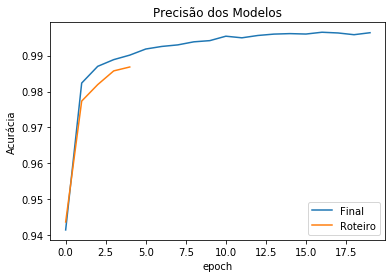

In [45]:
plt.plot(hist.history['acc'])
plt.plot(hist_t.history['acc'])
plt.title('Precisão dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('epoch')
plt.legend(['Final', 'Roteiro'], loc='best')
plt.show()

# Roteiro

# Treino

In [1]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model_t = tf.keras.models.Sequential()
model_t.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=(28, 28, 1)))
model_t.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_t.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_t.add(tf.keras.layers.Dropout(0.25))
model_t.add(tf.keras.layers.Flatten())
model_t.add(tf.keras.layers.Dense(128, activation='relu'))
model_t.add(tf.keras.layers.Dropout(0.5))
model_t.add(tf.keras.layers.Dense(10, activation='softmax'))

model_t.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

hist_t = model_t.fit(x_train, y_train, epochs=5)

model_t_json = model_t.to_json()
json_file = open("model_t_CNN.json", "w")
json_file.write(model_t_json)
json_file.close()
model_t.save_weights("model_t_CNN.h5")
print("Model saved to disk")
os.getcwd()

W0501 14:19:55.194093 22464 deprecation.py:506] From D:\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1870 - acc: 0.9437
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0756 - acc: 0.9773
Epoch 3/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0599 - acc: 0.9819
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0467 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0412 - acc: 0.9868
Model saved to disk


'C:\\Users\\T-Gamer\\Dropbox\\Aulas Doc\\EFC2\\Q4'

# Teste

In [2]:
mt = model_t.evaluate(x_test, y_test)
for metric_i in range(len(model_t.metrics_names)):
    metric_name = model_t.metrics_names[metric_i]
    metric_value = mt[metric_i]
    print('{}: {}'.format(metric_name, metric_value))  

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0313 - acc: 0.9911
loss: 0.03132838575012274
acc: 0.991100013256073


##  Curva de Aprendizado do Roteiro

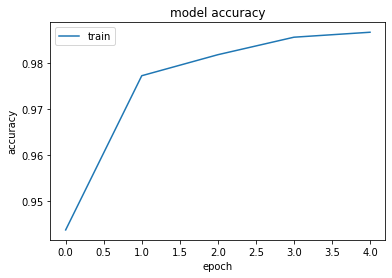

In [3]:
import matplotlib.pyplot as plt

plt.plot(hist_t.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Atividade

Para superar o desempenho encontrado no modelo do roteiro, assim como na Questão 3, irei realizar experimentos testando diferentes arquiteturas.

## Dados e Bibliotecas

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

Para realizar os experimentos, irei utilizar o batch_size = 256, com intuito de acelerar o treinamento.

## Experimento 1

Neste Experimento 1, iremos observar a influência de mais camadas convolucionais na arquitetura.

In [15]:
testes = 4
model = [0]*testes
m = {}
hist_all={}

for i in range(testes):
    if i ==  0:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
        model[i].add(tf.keras.layers.Dropout(0.25))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(128, activation='relu'))
        model[i].add(tf.keras.layers.Dropout(0.5))
        model[i].add(tf.keras.layers.Dense(10, activation='softmax'))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))
    if i ==  1:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
        
        model[i].add(tf.keras.layers.Dropout(0.25))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(128, activation='relu'))
        model[i].add(tf.keras.layers.Dropout(0.5))
        model[i].add(tf.keras.layers.Dense(10, activation='softmax'))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))
        
    if i ==  2:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Dropout(0.25))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(128, activation='relu'))
        model[i].add(tf.keras.layers.Dropout(0.5))
        model[i].add(tf.keras.layers.Dense(10, activation='softmax'))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))
    
    if i ==  3:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(128, (1, 1), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(128, (1, 1), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Dropout(0.25))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(128, activation='relu'))
        model[i].add(tf.keras.layers.Dropout(0.5))
        model[i].add(tf.keras.layers.Dense(10, activation='softmax'))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))

Inicio do Treino i = 0
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3655 - acc: 0.8839
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1004 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0696 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0562 - acc: 0.9835
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.0209 - acc: 0.9931
Fim do Treino i = 0 

Inicio do Treino i = 1
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2423 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0722 - acc: 0.9780
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0523 - acc: 0.9843
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0415 - acc: 0.9876
Epoch 5/5
10000/100

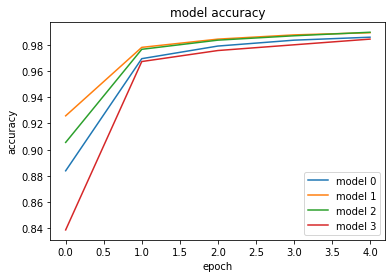

Model: 0 Treino: 0.983517 Teste: 0.993100
Model: 1 Treino: 0.987550 Teste: 0.992300
Model: 2 Treino: 0.986867 Teste: 0.993300
Model: 3 Treino: 0.979983 Teste: 0.992000


In [16]:
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
name = ['model 0','model 1','model 2','model 3']
plt.legend(name, loc='best')
plt.show()

for i in range(len(model)):
    print('Model: %d Treino: %f Teste: %f' %(i, hist_all[i].history['acc'][testes -1], m[i][1]))

De acordo com os resultados, o Modelo 2 teve o melhor desempenho.

## Experimento 2

Nesta etapa irei avaliar a influencia dos filtros das camadas convolucionais.

In [20]:
testes = 5
model = [0]*testes
m = {}
hist_all={}

for i in range(testes):
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(8*i+8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(16*i+16, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Conv2D(32*i+32, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(32*i+32, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Dropout(0.25))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(128, activation='relu'))
        model[i].add(tf.keras.layers.Dropout(0.5))
        model[i].add(tf.keras.layers.Dense(10, activation='softmax'))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))

Inicio do Treino i = 0
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4701 - acc: 0.8490
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1315 - acc: 0.9606
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1009 - acc: 0.9693
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0826 - acc: 0.9756
Epoch 5/5
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0304 - acc: 0.9904
Fim do Treino i = 0 

Inicio do Treino i = 1
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3739 - acc: 0.8818
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1042 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0732 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0581 - acc: 0.9821
Epoch 5/5
10000/10000 [

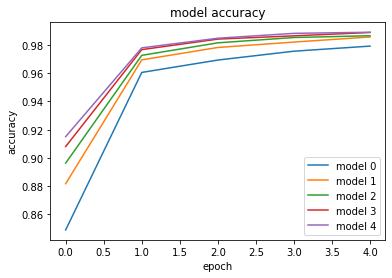

Model: 0 Treino: 0.979183 Teste: 0.990400
Model: 1 Treino: 0.985650 Teste: 0.992700
Model: 2 Treino: 0.986533 Teste: 0.994000
Model: 3 Treino: 0.988833 Teste: 0.993600
Model: 4 Treino: 0.989000 Teste: 0.993200


In [22]:
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
name = ['model 0','model 1','model 2','model 3','model 4']
plt.legend(name, loc='best')
plt.show()

for i in range(len(model)):
    print('Model: %d Treino: %f Teste: %f' %(i, hist_all[i].history['acc'][testes -1], m[i][1]))

De acordo com o experimento, mais filtros das camadas convolucionais geram melhores resultado. Entretanto, com o aumento desses valores o tempo de treinamento demora mais.
Dessa forma, foi escolhido o Modelo 2 para seguir adiante, uma vez que obteve a  melhor precisão com um tempo satisfatório.

## Implementação da Questão 3

Antes de continuarmos a mudança de arquitetura da CNN, irei implementar a etapa de classificação definida pela Questão 3.

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, batch_size = 256)
model.evaluate(x_test, y_test)


Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1225 - acc: 0.9626
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0402 - acc: 0.9879
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0302 - acc: 0.9906
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0220 - acc: 0.9934
Epoch 5/5
10000/10000 [==============================] - 1s 140us/sample - loss: 0.0202 - acc: 0.9933


[0.02021808194388868, 0.9933]

## Experimento 3

Observaremos nessa etapa a quantidade de Dropout entre as camadas convolucionais que gere um melhor resultado

In [28]:
testes = 7
model = [0]*testes
m = {}
hist_all={}

for i in range(testes):
    print('Inicio do Treino i = %d' %(i))
    model[i] = tf.keras.models.Sequential()
    model[i].add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[i].add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model[i].add(tf.keras.layers.Dropout(0.1*i))
    model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
    model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model[i].add(tf.keras.layers.Dropout(0.1*i))
    model[i].add(tf.keras.layers.Flatten())
    model[i].add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
    model[i].add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model[i].add(tf.keras.layers.BatchNormalization())
    model[i].add(tf.keras.layers.Dropout(0.2))
    model[i].add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model[i].compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    hist_all[i] = model[i].fit(x_train, y_train, epochs=5, batch_size = 256)
    m[i] = model[i].evaluate(x_test, y_test)
    print('Fim do Treino i = %d \n' %(i))

Inicio do Treino i = 0
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1208 - acc: 0.9656
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0373 - acc: 0.9891
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0247 - acc: 0.9929
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0185 - acc: 0.9942
Epoch 5/5
10000/10000 [==============================] - 1s 133us/sample - loss: 0.0374 - acc: 0.9884
Fim do Treino i = 0 

Inicio do Treino i = 1
Epoch 1/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1291 - acc: 0.9617
Epoch 2/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0383 - acc: 0.9885
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0270 - acc: 0.9919
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0220 - acc: 0.9931
Epoch 5/5
10000/10000

W0501 15:55:05.979674 22464 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0501 15:55:06.034527 22464 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3032 - acc: 0.9068
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0872 - acc: 0.9735
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0682 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0558 - acc: 0.9834
Epoch 5/5
10000/10000 [==============================] - 2s 152us/sample - loss: 0.0295 - acc: 0.9906
Fim do Treino i = 6 



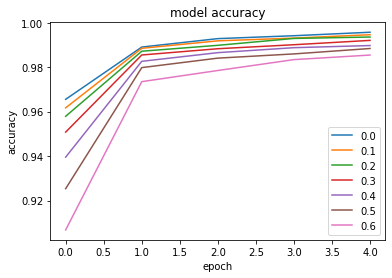

Model(0.0): 0 Treino: 0.995733 Teste: 0.988400
Model(0.1): 1 Treino: 0.994617 Teste: 0.988400
Model(0.2): 2 Treino: 0.993583 Teste: 0.992700
Model(0.3): 3 Treino: 0.992067 Teste: 0.993600
Model(0.4): 4 Treino: 0.989750 Teste: 0.993700
Model(0.5): 5 Treino: 0.988417 Teste: 0.989600
Model(0.6): 6 Treino: 0.985467 Teste: 0.990600


In [29]:
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6'], loc='best')
plt.show()
for i in range(len(model)):
    print('Model(0.%d): %d Treino: %f Teste: %f' %(i,i, hist_all[i].history['acc'][4],m[i][1]))

## Experimento 4
Irei implementar o Batch Normalization e aumentar  o treino para 10 epochs e observar a influencia do Batch Normalization, junto ou sem o Dropout.


In [36]:
testes = 3
model = [0]*testes
m = {}
hist_all={}

for i in range(testes):
    if i==0:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Dropout(0.4))
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.Dropout(0.4))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Dropout(0.2))
        model[i].add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=15, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))
    if i==1:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Dropout(0.4))
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Dropout(0.4))
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Dropout(0.2))
        model[i].add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=15, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))
    if i==2:
        print('Inicio do Treino i = %d' %(i))
        model[i] = tf.keras.models.Sequential()
        model[i].add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model[i].add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
        model[i].add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Flatten())
        model[i].add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
        model[i].add(tf.keras.layers.BatchNormalization())
        model[i].add(tf.keras.layers.Dropout(0.2))
        model[i].add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

        model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

        hist_all[i] = model[i].fit(x_train, y_train, epochs=15, batch_size = 256)
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do Treino i = %d \n' %(i))

Inicio do Treino i = 0
Epoch 1/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2084 - acc: 0.9357
Epoch 2/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0614 - acc: 0.9818
Epoch 3/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0455 - acc: 0.9856
Epoch 4/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0351 - acc: 0.9894
Epoch 5/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0314 - acc: 0.9900
Epoch 6/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0293 - acc: 0.9912
Epoch 7/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0240 - acc: 0.9926
Epoch 8/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0226 - acc: 0.9932
Epoch 9/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0193 - acc: 0.9938
Epoch 10/15
60000/60000 [=========================

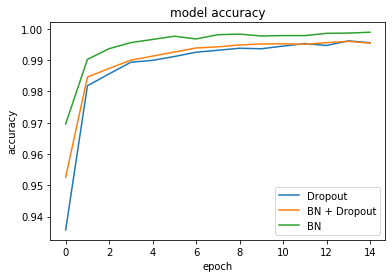

Model(Dropout):
Treino: 0.993650 Teste: 0.994800 

Model(BN + Dropout):
Treino: 0.995183 Teste: 0.993800 

Model(BN):
Treino: 0.997733 Teste: 0.993000 



In [38]:
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
name = ['Dropout','BN + Dropout','BN']
plt.legend(name, loc='best')
plt.show()

for i in range(len(model)):
    print('Model(%s):'%(name[i]))
    print('Treino: %f Teste: %f \n' %( hist_all[i].history['acc'][9], m[i][1]))

Nesse experimento observamos que a utilização somente do Dropout entre as camadas connvolucionais resulta numa melhor performance.

## Finalização
Para finalizar irei rodar a arquitetura com 20 epochs ( Igualmente feito na Questão 3).

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(48, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=20, batch_size = 256)

model_json = model.to_json()
json_file = open("model_CNN.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN.h5")
print("Model saved to disk")
os.getcwd()

W0501 16:52:54.599804 16684 deprecation.py:506] From D:\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1976 - acc: 0.9406
Epoch 2/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0576 - acc: 0.9829
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0439 - acc: 0.9870
Epoch 4/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0356 - acc: 0.9890
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0319 - acc: 0.9903
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0264 - acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0251 - acc: 0.9922
Epoch 8/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0208 - acc: 0.9932
Epoch 9/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0189 - acc: 0.9940
Epoch 10/20
60000/60000 [==============================] - 5s 89us/sample - loss:

'C:\\Users\\T-Gamer\\Dropbox\\Aulas Doc\\EFC2\\Q4'

In [4]:
mf = model.evaluate(x_test, y_test)

for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = mf[metric_i]
    print('{}: {}'.format(metric_name, metric_value))  

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0154 - acc: 0.9952
loss: 0.015419354572380507
acc: 0.995199978351593


In [ ]:
model_m = tf.keras.models.Sequential()

# model_m.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))
# model_m.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# model_m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model_m.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model_m.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

# model_m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model_m.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
# model_m.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
# model_m.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
# model_m.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))

# model_m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))

model_m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model_m.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))

model_m.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_m.add(tf.keras.layers.Flatten())

model_m.add(tf.keras.layers.Dense(512, activation='relu'))

model_m.add(tf.keras.layers.Dense(512, activation='relu'))

model_m.add(tf.keras.layers.Dense(10, activation='softmax'))

model_m.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
hist = model_m.fit(x_train, y_train, epochs=5)


In [ ]:
model_m.evaluate(x_test, y_test)